<a href="https://colab.research.google.com/github/Moyscr/programaDelfin/blob/master/modelado_datos_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook requirements


In [1]:
!pwd

/content


In [2]:
project_path = "/content/drive/MyDrive/Colab Notebooks/DELFIN 2023"
settings_path = "/content/drive/MyDrive/Colab Notebooks/DELFIN 2023/SETTINGS"
models_path = "/content/drive/MyDrive/Colab Notebooks/DELFIN 2023/MODELS/"
data_path = "/content/drive/MyDrive/Colab Notebooks/DELFIN 2023/DATA/"
notebooks_path = "/content/drive/MyDrive/Colab Notebooks/DELFIN 2023/NOTEBOOKS/"
results_path = "/content/drive/MyDrive/Colab Notebooks/DELFIN 2023/RESULTS/"

In [3]:
import os

def authenticate_kaggle(key_path):
    # Mount your Google Drive to Colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Copy the Kaggle API key from your Drive to the .kaggle directory in your Drive
    !mkdir -p /root/.kaggle
    !cp '{key_path}/kaggle.json' /root/.kaggle/

    # Set the permissions for the Kaggle API key
    !chmod 600 /root/.kaggle/kaggle.json

    # Authenticate with the Kaggle API
    os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"

    if os.environ.get('KAGGLE_CONFIG_DIR') == "/root/.kaggle":
        print('Authenticated with Kaggle API')

In [4]:
authenticate_kaggle(settings_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Authenticated with Kaggle API


In [5]:
import os
import re

def download_dataset(command_string):
    # Extract dataset name from command string
    match = re.search(r'-d\s+([\w/\-]+)', command_string)
    if not match:
        print('Invalid command string. Please specify dataset name in the format "kaggle datasets download -d <dataset_name>".')
        return
    dataset_name = match.group(1)

    # # Authenticate with the Kaggle API
    # authenticate_kaggle(key_path)

    # Download the dataset using the Kaggle API
    !kaggle datasets download -d {dataset_name}

    # Define the name of the zip file
    zip_file = dataset_name.split("/")[-1] #+ ".zip"

    # Remove existing directory with the same name as the dataset
    if os.path.exists(dataset_name.split("/")[-1]):
        !rm -r {dataset_name.split("/")[-1]}

    # Unzip the file
    !unzip -q {zip_file} -d {dataset_name.split("/")[-1]}

    # Check if the dataset folder exists
    if os.path.exists(dataset_name.split("/")[-1]):
        print("Dataset downloaded and extracted successfully!")
    else:
        print("Error: Dataset not downloaded or extracted successfully.")

In [6]:
%cd '{data_path}'

/content/drive/MyDrive/Colab Notebooks/DELFIN 2023/DATA


In [7]:
command_string = "kaggle datasets download -d raaad3000/delfin-2023"
download_dataset(command_string)

403 - Forbidden - Permission 'datasets.get' was denied
Dataset downloaded and extracted successfully!


In [8]:
%ls

delfin-2023/  delfin-2023.zip  logs.log


In [9]:
# DEFUN 2021
!head '/content/drive/MyDrive/Colab Notebooks/DELFIN 2023/DATA/delfin-2023/delfin-2023/DEFUN_2021/conjunto_de_datos_defunciones_registradas_2021.csv'

ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,lista_mex,sexo,edad,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,ocupacion,escolarida,edo_civil,presunto,ocurr_trab,lugar_ocur,necropsia,asist_medi,sitio_ocur,cond_cert,nacionalid,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,vio_fami,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
"01","001","01","001",15,"0001","01","001",15,"0001","F03X","22A",1,4075,12,1,2013,3,3,2021,15,5,1937,11,1,5,8,8,88,9,9,1,3,1,7,8,8,14,15,5,1,"057"," 22",8,1,"20",8,99,3,2021,"",2,2,88,"88","888","8888",0,"999"
"01","001","01","001",15,"0001","01","001",15,"0001","I678","30Z",2,4070,29,11,2011,11,1,2021,6,8,1941,11,4,5,8,8,88,2,1,3,3,1,3,8,8,14,50,9,7,"069"," 30",8,1,"19",8,99,1,2021,"",9,2,88,"88","888","8888",0,"999"
"01","001",

In [10]:
#Censo
!head '/content/drive/MyDrive/Colab Notebooks/DELFIN 2023/DATA/delfin-2023/delfin-2023/iter_00_cpv2020_csv/iter_00_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv'

﻿ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACEN

In [11]:
#DEFUN 2020
!head '/content/drive/MyDrive/Colab Notebooks/DELFIN 2023/DATA/delfin-2023/delfin-2023/DEFUN_2020/conjunto_de_datos_defunciones_registrados_2020.csv'

ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,lista_mex,sexo,edad,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,ocupacion,escolarida,edo_civil,presunto,ocurr_trab,lugar_ocur,necropsia,asist_medi,sitio_ocur,cond_cert,nacionalid,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,vio_fami,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
"01","001","01","001",15,"0001","01","001",15,"0001","J441","33G",2,4074,25,11,2016,16,1,2020,31,3,1942,99,3,5,8,8,88,2,1,11,3,1,3,8,8,8,15,10,5,"076"," 33",8,1,"19",8,99,1,2020,"",2,9,88,"88","888","8888",0,"999"
"01","001","01","001",15,"0001","01","001",15,"0001","K566","35I",2,4087,7,2,2016,23,11,2020,19,3,1928,99,1,3,8,8,88,9,1,1,3,1,99,8,8,17,50,11,6,"081"," 35",8,1,"22",8,99,11,2020,"",9,9,88,"88","888","8888",0,"999"
"01",

# Install libraries

In [12]:
!pip install dataprep pycaret watermark --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.9 MB/s eta 0:00:0

# Load libraries

In [13]:
# Wrangling
import pandas as pd
import numpy as np
from dataprep.eda import create_report

# Watermark
%reload_ext watermark
%watermark -a "Moises Contreras" -p numpy,pandas,dataprep,sklearn,pycaret,matplotlib,plotly

Author: Moises Contreras

numpy     : 1.22.4
pandas    : 1.5.3
dataprep  : 0.4.5
sklearn   : 1.2.2
pycaret   : 3.0.4
matplotlib: 3.7.1
plotly    : 5.13.1



#Load data

In [14]:
url01 = '/content/drive/MyDrive/Colab Notebooks/DELFIN 2023/DATA/delfin-2023/delfin-2023/DEFUN_2020/conjunto_de_datos_defunciones_registrados_2020.csv'
url02 = '/content/drive/MyDrive/Colab Notebooks/DELFIN 2023/DATA/delfin-2023/delfin-2023/DEFUN_2021/conjunto_de_datos_defunciones_registradas_2021.csv'
url03 = '/content/drive/MyDrive/Colab Notebooks/DELFIN 2023/DATA/delfin-2023/delfin-2023/iter_00_cpv2020_csv/iter_00_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv'

# Defunciones

In [15]:
data_defunciones_2020 = pd.read_csv(str(url01))
print(f'Dataset shape: {data_defunciones_2020.shape}')
data_defunciones_2020.head()

Dataset shape: (1086743, 59)


,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,9,88,88,888,8888,0,999
1,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,9,9,88,88,888,8888,0,999
2,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,2,88,88,888,8888,0,999
3,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,9,9,88,88,888,8888,0,999
4,1,6,1,9,4,1,1,9,4,1,...,2020,NaN,2,1,88,88,888,8888,0,999


In [16]:
data_defunciones_2020.columns

Index(['ent_regis', 'mun_regis', 'ent_resid', 'mun_resid', 'tloc_resid',
       'loc_resid', 'ent_ocurr', 'mun_ocurr', 'tloc_ocurr', 'loc_ocurr',
       'causa_def', 'lista_mex', 'sexo', 'edad', 'dia_ocurr', 'mes_ocurr',
       'anio_ocur', 'dia_regis', 'mes_regis', 'anio_regis', 'dia_nacim',
       'mes_nacim', 'anio_nacim', 'ocupacion', 'escolarida', 'edo_civil',
       'presunto', 'ocurr_trab', 'lugar_ocur', 'necropsia', 'asist_medi',
       'sitio_ocur', 'cond_cert', 'nacionalid', 'derechohab', 'embarazo',
       'rel_emba', 'horas', 'minutos', 'capitulo', 'grupo', 'lista1',
       'gr_lismex', 'vio_fami', 'area_ur', 'edad_agru', 'complicaro',
       'dia_cert', 'mes_cert', 'anio_cert', 'maternas', 'lengua', 'cond_act',
       'par_agre', 'ent_ocules', 'mun_ocules', 'loc_ocules', 'razon_m',
       'dis_re_oax'],
      dtype='object')

In [17]:
data_defunciones_2021 = pd.read_csv(str(url02))
print(f'Dataset shape: {data_defunciones_2021.shape}')
data_defunciones_2021.head()

Dataset shape: (1122249, 59)


,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,1,1,15,1,1,1,15,1,...,2021,NaN,2,2,88,88,888,8888,0,999
1,1,1,1,1,15,1,1,1,15,1,...,2021,NaN,9,2,88,88,888,8888,0,999
2,1,1,1,6,9,1,1,6,9,1,...,2021,NaN,2,2,88,88,888,8888,0,999
3,1,1,1,1,15,1,1,1,15,1,...,2021,NaN,9,2,88,88,888,8888,0,999
4,1,1,1,2,5,1,1,2,5,1,...,2021,NaN,9,2,88,88,888,8888,0,999


In [18]:
data_defunciones_2021.columns

Index(['ent_regis', 'mun_regis', 'ent_resid', 'mun_resid', 'tloc_resid',
       'loc_resid', 'ent_ocurr', 'mun_ocurr', 'tloc_ocurr', 'loc_ocurr',
       'causa_def', 'lista_mex', 'sexo', 'edad', 'dia_ocurr', 'mes_ocurr',
       'anio_ocur', 'dia_regis', 'mes_regis', 'anio_regis', 'dia_nacim',
       'mes_nacim', 'anio_nacim', 'ocupacion', 'escolarida', 'edo_civil',
       'presunto', 'ocurr_trab', 'lugar_ocur', 'necropsia', 'asist_medi',
       'sitio_ocur', 'cond_cert', 'nacionalid', 'derechohab', 'embarazo',
       'rel_emba', 'horas', 'minutos', 'capitulo', 'grupo', 'lista1',
       'gr_lismex', 'vio_fami', 'area_ur', 'edad_agru', 'complicaro',
       'dia_cert', 'mes_cert', 'anio_cert', 'maternas', 'lengua', 'cond_act',
       'par_agre', 'ent_ocules', 'mun_ocules', 'loc_ocules', 'razon_m',
       'dis_re_oax'],
      dtype='object')

# Censo

In [19]:
data_censo = pd.read_csv(str(url03))
print(f'Dataset shape: {data_censo.shape}')
data_censo.head()

Dataset shape: (195662, 286)


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,...,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*
1,0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,NaN,250354,...,47005,8385,18981,1732,1113,12775,14143,51293,7154,*
2,0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,NaN,147125,...,25581,5027,11306,971,708,8247,10065,29741,5283,*
3,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,...,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
4,1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,...,732,205,212,48,41,39,62,530,20,*


#Fusion Data

#Vertically

In [20]:
data_defunciones = pd.concat([data_defunciones_2020, data_defunciones_2021], axis=0)
print(f'Dataset shape: {data_defunciones.shape}')
data_defunciones.head()

Dataset shape: (2208992, 59)


,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,9,88,88,888,8888,0,999
1,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,9,9,88,88,888,8888,0,999
2,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,2,88,88,888,8888,0,999
3,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,9,9,88,88,888,8888,0,999
4,1,6,1,9,4,1,1,9,4,1,...,2020,NaN,2,1,88,88,888,8888,0,999


In [21]:
data_defunciones.columns

Index(['ent_regis', 'mun_regis', 'ent_resid', 'mun_resid', 'tloc_resid',
       'loc_resid', 'ent_ocurr', 'mun_ocurr', 'tloc_ocurr', 'loc_ocurr',
       'causa_def', 'lista_mex', 'sexo', 'edad', 'dia_ocurr', 'mes_ocurr',
       'anio_ocur', 'dia_regis', 'mes_regis', 'anio_regis', 'dia_nacim',
       'mes_nacim', 'anio_nacim', 'ocupacion', 'escolarida', 'edo_civil',
       'presunto', 'ocurr_trab', 'lugar_ocur', 'necropsia', 'asist_medi',
       'sitio_ocur', 'cond_cert', 'nacionalid', 'derechohab', 'embarazo',
       'rel_emba', 'horas', 'minutos', 'capitulo', 'grupo', 'lista1',
       'gr_lismex', 'vio_fami', 'area_ur', 'edad_agru', 'complicaro',
       'dia_cert', 'mes_cert', 'anio_cert', 'maternas', 'lengua', 'cond_act',
       'par_agre', 'ent_ocules', 'mun_ocules', 'loc_ocules', 'razon_m',
       'dis_re_oax'],
      dtype='object')

In [22]:
time_features = ['anio_nacim', 'anio_ocur', 'anio_regis', 'anio_cert']

In [23]:
data_defunciones[time_features]

,anio_nacim,anio_ocur,anio_regis,anio_cert
0,1942,2016,2020,2020
1,1928,2016,2020,2020
2,1949,2011,2020,2020
3,1936,2017,2020,2020
4,1939,2018,2020,2020
...,...,...,...,...
1122244,1933,2021,2021,2021
1122245,1972,2021,2021,2021
1122246,1941,2021,2021,2021
1122247,1972,2021,2021,2021


In [24]:
time_features = ['anio_ocur', 'anio_regis', 'anio_cert']

In [25]:
data_defunciones[time_features]

,anio_ocur,anio_regis,anio_cert
0,2016,2020,2020
1,2016,2020,2020
2,2011,2020,2020
3,2017,2020,2020
4,2018,2020,2020
...,...,...,...
1122244,2021,2021,2021
1122245,2021,2021,2021
1122246,2021,2021,2021
1122247,2021,2021,2021


In [26]:
data_defunciones[time_features].value_counts()

anio_ocur  anio_regis  anio_cert
2021       2021        2021         1098301
2020       2020        2020         1069958
           2021        2020           15117
2019       2020        2019           10461
2020       2021        2021            5501
                                     ...   
1970       2020        2020               1
1982       2020        2020               1
1986       2020        2020               1
2016       2020        2019               1
1918       2021        2021               1
Length: 131, dtype: int64

In [27]:
data_defunciones[data_defunciones.anio_ocur > 2019].shape, data_defunciones.shape

((2189871, 59), (2208992, 59))

In [28]:
data_defunciones[data_defunciones.anio_ocur > 2019]

,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
5,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,1,88,88,888,8888,0,999
19,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,2,88,88,888,8888,0,999
28,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,2,88,88,888,8888,0,999
29,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,2,88,88,888,8888,0,999
30,1,1,1,1,15,1,1,1,15,1,...,2020,NaN,2,1,88,1,1,1,0,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122244,32,54,32,54,1,24,32,17,13,1,...,2021,NaN,2,2,88,88,888,8888,0,999
1122245,32,56,32,17,13,1,32,56,13,1,...,2021,NaN,2,1,88,88,888,8888,0,999
1122246,32,17,32,17,2,17,32,17,13,1,...,2021,NaN,2,2,88,88,888,8888,0,999
1122247,32,49,99,999,99,9999,32,17,13,1,...,2021,NaN,2,1,88,88,888,8888,0,999


In [29]:
data_defunciones[data_defunciones.anio_ocur > 2019][['anio_regis', 'anio_cert']].value_counts()

anio_regis  anio_cert
2021        2021         1104106
2020        2020         1070646
2021        2020           15119
dtype: int64

In [30]:
data_defunciones[data_defunciones.anio_ocur <= 2019][['anio_regis', 'anio_cert']].value_counts()

anio_regis  anio_cert
2020        2019         10483
            2020          5614
2021        2021          3002
            2020            22
dtype: int64

In [31]:
temporal = data_defunciones[data_defunciones.anio_ocur > 2019]
temporal.columns.difference(['anio_regis', 'anio_cert'])

Index(['anio_nacim', 'anio_ocur', 'area_ur', 'asist_medi', 'capitulo',
       'causa_def', 'complicaro', 'cond_act', 'cond_cert', 'derechohab',
       'dia_cert', 'dia_nacim', 'dia_ocurr', 'dia_regis', 'dis_re_oax', 'edad',
       'edad_agru', 'edo_civil', 'embarazo', 'ent_ocules', 'ent_ocurr',
       'ent_regis', 'ent_resid', 'escolarida', 'gr_lismex', 'grupo', 'horas',
       'lengua', 'lista1', 'lista_mex', 'loc_ocules', 'loc_ocurr', 'loc_resid',
       'lugar_ocur', 'maternas', 'mes_cert', 'mes_nacim', 'mes_ocurr',
       'mes_regis', 'minutos', 'mun_ocules', 'mun_ocurr', 'mun_regis',
       'mun_resid', 'nacionalid', 'necropsia', 'ocupacion', 'ocurr_trab',
       'par_agre', 'presunto', 'razon_m', 'rel_emba', 'sexo', 'sitio_ocur',
       'tloc_ocurr', 'tloc_resid', 'vio_fami'],
      dtype='object')

#Wrangling data

In [32]:
# Estas variables NO las queremos del defunciones
defunciones_non_features = ['ent_regis', 'mun_regis', 'dia_regis', 'mes_regis', 'anio_regis', 'dia_cert', 'mes_cert', 'anio_cert', 'dis_re_oax', 'loc_ocules', 'mun_ocules']
print(f'Número de variables que no queremos de defunciones: {len(defunciones_non_features)}')

Número de variables que no queremos de defunciones: 11


In [33]:
type(temporal.columns.difference(defunciones_non_features))

pandas.core.indexes.base.Index

In [34]:
temporal.columns.difference(defunciones_non_features)

Index(['anio_nacim', 'anio_ocur', 'area_ur', 'asist_medi', 'capitulo',
       'causa_def', 'complicaro', 'cond_act', 'cond_cert', 'derechohab',
       'dia_nacim', 'dia_ocurr', 'edad', 'edad_agru', 'edo_civil', 'embarazo',
       'ent_ocules', 'ent_ocurr', 'ent_resid', 'escolarida', 'gr_lismex',
       'grupo', 'horas', 'lengua', 'lista1', 'lista_mex', 'loc_ocurr',
       'loc_resid', 'lugar_ocur', 'maternas', 'mes_nacim', 'mes_ocurr',
       'minutos', 'mun_ocurr', 'mun_resid', 'nacionalid', 'necropsia',
       'ocupacion', 'ocurr_trab', 'par_agre', 'presunto', 'razon_m',
       'rel_emba', 'sexo', 'sitio_ocur', 'tloc_ocurr', 'tloc_resid',
       'vio_fami'],
      dtype='object')

In [35]:
temporal = temporal[temporal.columns.difference(defunciones_non_features)]
temporal.shape

(2189871, 48)

# Defunciones 💀

In [36]:
defunciones = ["J680", "J42X", "J411", "J410", "J40X", "J209", "J208", "J982", "P250", "J431", "J432", "J438", "J439"]

# Now you can print this list
defunciones_interest_df = temporal[temporal['causa_def'].isin(defunciones)]
defunciones_interest_df.shape

(6995, 48)

In [37]:
defunciones_interest_df.duplicated().sum()

0

In [38]:
df = defunciones_interest_df.copy()

In [39]:
data_defunciones.shape, df.shape

((2208992, 59), (6995, 48))

#Horizontally

In [40]:
data_keys = ['ent_resid', 'mun_resid', 'loc_resid']
data_keys

['ent_resid', 'mun_resid', 'loc_resid']

In [41]:
df[data_keys].value_counts()

ent_resid  mun_resid  loc_resid
11         20         1            153
8          37         1            151
14         39         1            110
9          5          1             75
2          2          1             74
                                  ... 
15         119        1              1
                      5              1
                      8              1
           120        14             1
17         24         1              1
Length: 2854, dtype: int64

In [42]:
data_censo[['ENTIDAD', 'MUN', 'LOC']].value_counts()

ENTIDAD  MUN  LOC 
0        0    0       1
21       137  55      1
              25      1
              34      1
              35      1
                     ..
11       30   272     1
              273     1
              274     1
              275     1
32       58   9998    1
Length: 195662, dtype: int64

In [43]:
data_censo.rename(columns={"ENTIDAD": "ent_resid", "MUN": "mun_resid", "LOC": "loc_resid"}, inplace=True)

In [44]:
data_censo[data_keys].head()

,ent_resid,mun_resid,loc_resid
0,0,0,0
1,0,0,9998
2,0,0,9999
3,1,0,0
4,1,0,9998


#Wrangling data

In [45]:
# Estas variables SI las queremos del censo
censo_features = [
    'ent_resid', 'mun_resid', 'loc_resid',
    'NOM_ENT', 'NOM_MUN', 'NOM_LOC', 'ALTITUD', 'POBTOT', 'POBFEM', 'POBMAS', 'REL_H_M', 'PROM_HNV', 'PNACENT',
    'PNACENT_F', 'PNACENT_M', 'PNACOE', 'PNACOE_F', 'PNACOE_M', 'PHOG_IND', 'POB_AFRO', 'POB_AFRO_F', 'POB_AFRO_M',
    'PCON_DISC', 'PCON_LIMI', 'PCLIM_PMEN', 'PSIND_LIM', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'PSINDER', 'PDER_SS',
    'TOTHOG', 'HOGJEF_F', 'HOGJEF_M', 'POBHOG', 'PHOGJEF_F', 'PHOGJEF_M', 'VIVTOT', 'TVIVHAB', 'TVIVPAR', 'VIVPAR_HAB',
    'VIVPARH_CV', 'TVIVPARHAB', 'VIVPAR_DES', 'VIVPAR_UT', 'OCUPVIVPAR', 'PROM_OCUP', 'PRO_OCUP_C'
]
print(f'Número de variables que si queremos del censo: {len(censo_features)}')

Número de variables que si queremos del censo: 48


In [46]:
# pd.concat([data_defunciones_2020, data_defunciones_2021], axis=0)

data = df.merge(data_censo[censo_features], how='inner', on=data_keys)
print(f'Dataset shape: {data.shape}')
data.head()

Dataset shape: (6662, 93)


,anio_nacim,anio_ocur,area_ur,asist_medi,capitulo,causa_def,complicaro,cond_act,cond_cert,derechohab,...,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C
0,2019,2020,1,1,10,J209,8,8,3,99,...,4699,5369,4688,4691,4695,590,91,18788,4,1.03
1,1930,2020,1,1,10,J209,8,2,3,2,...,4699,5369,4688,4691,4695,590,91,18788,4,1.03
2,1955,2021,1,1,10,J209,8,1,3,2,...,4699,5369,4688,4691,4695,590,91,18788,4,1.03
3,1935,2020,1,1,10,J680,8,2,3,2,...,5626,6897,5610,5612,5620,857,430,20972,3.73,0.96
4,1932,2020,1,1,10,J40X,8,2,3,99,...,5626,6897,5610,5612,5620,857,430,20972,3.73,0.96


# Create report

In [47]:
# Generate the report
#report = create_report(data_aire.sample(n=1000, random_state=32))

In [48]:
#report.save(str(results_path + 'report_aire.html'))

#Preprocessing data

In [49]:
data.shape

(6662, 93)

In [50]:
data.head()

,anio_nacim,anio_ocur,area_ur,asist_medi,capitulo,causa_def,complicaro,cond_act,cond_cert,derechohab,...,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C
0,2019,2020,1,1,10,J209,8,8,3,99,...,4699,5369,4688,4691,4695,590,91,18788,4,1.03
1,1930,2020,1,1,10,J209,8,2,3,2,...,4699,5369,4688,4691,4695,590,91,18788,4,1.03
2,1955,2021,1,1,10,J209,8,1,3,2,...,4699,5369,4688,4691,4695,590,91,18788,4,1.03
3,1935,2020,1,1,10,J680,8,2,3,2,...,5626,6897,5610,5612,5620,857,430,20972,3.73,0.96
4,1932,2020,1,1,10,J40X,8,2,3,99,...,5626,6897,5610,5612,5620,857,430,20972,3.73,0.96


In [51]:
categorical_features = ['area_ur', 'edad', #'loc_ocules', 'mun_ocules',  #'capitulo',  # 'lista_mex',
                        'NOM_ENT', 'NOM_MUN', 	'NOM_LOC']

numerical_features = data.columns.difference(categorical_features + ['capitulo',  'lista_mex', 'causa_def'])



In [52]:
data[categorical_features].head()

,area_ur,edad,NOM_ENT,NOM_MUN,NOM_LOC
0,1,3001,Aguascalientes,San Francisco de los Romo,San Francisco de los Romo
1,1,4090,Aguascalientes,San Francisco de los Romo,San Francisco de los Romo
2,1,4065,Aguascalientes,San Francisco de los Romo,San Francisco de los Romo
3,1,4084,Aguascalientes,Calvillo,Calvillo
4,1,4088,Aguascalientes,Calvillo,Calvillo


In [53]:
data[categorical_features].nunique()

area_ur       3
edad        121
NOM_ENT      32
NOM_MUN    1207
NOM_LOC    2397
dtype: int64

In [54]:
data[categorical_features].nunique().sum()

3760

In [55]:
data[numerical_features].head()

,ALTITUD,GRAPROES,GRAPROES_F,GRAPROES_M,HOGJEF_F,HOGJEF_M,OCUPVIVPAR,PCLIM_PMEN,PCON_DISC,PCON_LIMI,...,ocurr_trab,par_agre,presunto,razon_m,rel_emba,sexo,sitio_ocur,tloc_ocurr,tloc_resid,vio_fami
0,1890.0,9.13,9.16,9.11,1424,3271,18788,229,764,1465,...,8,88,8,0,8,1,11,7,7,8
1,1890.0,9.13,9.16,9.11,1424,3271,18788,229,764,1465,...,8,88,8,0,8,2,11,7,7,8
2,1890.0,9.13,9.16,9.11,1424,3271,18788,229,764,1465,...,8,88,8,0,8,1,11,7,7,8
3,1632.0,8.77,8.92,8.62,1902,3718,20972,424,1378,2245,...,8,88,8,0,8,2,11,7,7,8
4,1632.0,8.77,8.92,8.62,1902,3718,20972,424,1378,2245,...,8,88,8,0,8,1,11,7,7,8


#Preprocessed

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Define

In [57]:
# Preprocessing pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('encoding', QuantileTransformer(output_distribution='normal')),
    # ('encoding', StandardScaler())

])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='None', add_indicator=True)),
    ('encoding', OneHotEncoder(max_categories=50))
    # ('encoding', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('encoding',
                                                  QuantileTransformer(output_distribution='normal'))]),
                                 Index(['ALTITUD', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'HOGJEF_F',
       'HOGJEF_M', 'OCUPVIVPAR', 'PCLIM_PMEN', 'PCON_DISC', 'PCON_LIMI',
       'PDER_SS', 'PHOGJEF_F', 'PHOGJEF_M', 'PHOG_...
       'mun_ocurr', 'mun_resid', 'nacionalid', 'necropsia', 'ocupacion',
       'ocurr_trab', 'par_agre', 'presunto', 'razon_m', 'rel_emba', 'sexo',
       'sitio_ocur', 'tloc_ocurr', 'tloc_resid', 'vio_fami'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                fill_value='None',
                                                                strategy='constant')),
                                                 ('encoding',
                                                  OneHotEncoder(max_categories=50))]),
                                 ['area_ur', 'edad', 'NOM_ENT', 'NOM_MUN',
                                  'NOM_LOC'])])

#Use

In [58]:
data.replace({'*' : np.nan}, inplace=True)

In [59]:
data.head(1)

,anio_nacim,anio_ocur,area_ur,asist_medi,capitulo,causa_def,complicaro,cond_act,cond_cert,derechohab,...,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C
0,2019,2020,1,1,10,J209,8,8,3,99,...,4699,5369,4688,4691,4695,590,91,18788,4,1.03


In [60]:
data.causa_def.head()

0    J209
1    J209
2    J209
3    J680
4    J40X
Name: causa_def, dtype: object

In [61]:
# data.drop(['causa_def'], axis=1)
data[data.columns.difference(['causa_def'])].shape

(6662, 92)

In [62]:
preprocessed_features = preprocessor.fit_transform(data[data.columns.difference(['causa_def'])])

In [63]:
preprocessed_data = pd.DataFrame(preprocessed_features,
                                  #  columns=data.columns,
                                  index=data.index)

preprocessed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,299,300,301,302,303,304,305,306,307,308
0,0.535083,-0.352151,-0.293986,-0.378977,-0.265794,-0.224252,-0.213636,-0.195198,-0.283522,-0.315891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.535083,-0.352151,-0.293986,-0.378977,-0.265794,-0.224252,-0.213636,-0.195198,-0.283522,-0.315891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.535083,-0.352151,-0.293986,-0.378977,-0.265794,-0.224252,-0.213636,-0.195198,-0.283522,-0.315891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.176349,-0.479432,-0.404717,-0.543789,-0.198258,-0.193391,-0.193143,-0.033880,-0.104275,-0.195700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.176349,-0.479432,-0.404717,-0.543789,-0.198258,-0.193391,-0.193143,-0.033880,-0.104275,-0.195700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [64]:
preprocessed_data = pd.concat([preprocessed_data, data[['causa_def']]],
                    axis=1)

In [65]:
non_defunciones = ['J410', 'J438', 'J432', 'J431', 'P250', 'J208', 'J411']

In [66]:
preprocessed_data[preprocessed_data.causa_def.isin(non_defunciones)].shape

(52, 310)

In [67]:
preprocessed_data = preprocessed_data[~preprocessed_data.causa_def.isin(non_defunciones)]
preprocessed_data.shape

(6610, 310)

#Modeling

In [68]:
preprocessed_data.shape

(6610, 310)

In [69]:
targets = ['causa_def']
targets

['causa_def']

In [70]:
target_values = preprocessed_data[targets] # define y
features_values = preprocessed_data[preprocessed_data.columns.difference(['causa_def'])]  # define X

target_values.shape, features_values.shape

((6610, 1), (6610, 309))

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_val, y_train, y_val = train_test_split(features_values,
                                                  target_values,
                                                  stratify=target_values,
                                                  train_size=0.9)

(X_train.shape, y_train.shape), (X_val.shape, y_val.shape)

(((5949, 309), (5949, 1)), ((661, 309), (661, 1)))

In [73]:
from pycaret.classification import *

In [74]:
temp = pd.concat([X_train, y_train], axis=1)
temp.head(1)

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,causa_def
837,1.272478,-2.025787,-2.296561,-1.539635,-0.717887,-0.659538,-0.598131,-1.192071,-0.899534,-0.899534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,J439


In [75]:
temp.causa_def.value_counts()

J439    3896
J42X    1181
J209     520
J40X     185
J680     143
J982      24
Name: causa_def, dtype: int64

In [76]:
ml_exp_01 = setup(
    data=temp,
    target='causa_def',
    session_id=42, #equivalente a random_state
    train_size=0.9
)

,Description,Value
0,Session id,42
1,Target,causa_def
2,Target type,Multiclass
3,Target mapping,"J209: 0, J40X: 1, J42X: 2, J439: 3, J680: 4, J982: 5"
4,Original data shape,"(5949, 310)"
5,Transformed data shape,"(5949, 310)"
6,Transformed train set shape,"(5354, 310)"
7,Transformed test set shape,"(595, 310)"
8,Numeric features,309
9,Preprocess,True


In [77]:
best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7826,0.8250,0.7826,0.7359,0.7419,0.5209,0.5510,6.3440
gbc,Gradient Boosting Classifier,0.7815,0.8222,0.7815,0.7408,0.7304,0.5067,0.5525,39.2940
xgboost,Extreme Gradient Boosting,0.7790,0.8202,0.7790,0.7342,0.7413,0.5173,0.5432,27.8220
rf,Random Forest Classifier,0.7755,0.8196,0.7755,0.7290,0.7242,0.4885,0.5348,2.7600
et,Extra Trees Classifier,0.7729,0.8150,0.7729,0.7194,0.7240,0.4915,0.5288,2.2740
lr,Logistic Regression,0.7693,0.8018,0.7693,0.7154,0.7239,0.4886,0.5209,10.2340
ridge,Ridge Classifier,0.7479,0.0000,0.7479,0.6754,0.6820,0.4057,0.4619,0.2980
ada,Ada Boost Classifier,0.7464,0.6465,0.7464,0.5635,0.6401,0.3618,0.4867,2.3260
svm,SVM - Linear Kernel,0.7221,0.0000,0.7221,0.7096,0.6788,0.4113,0.4621,1.3600
knn,K Neighbors Classifier,0.6933,0.6803,0.6933,0.6318,0.6447,0.2912,0.3178,0.8540


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [78]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

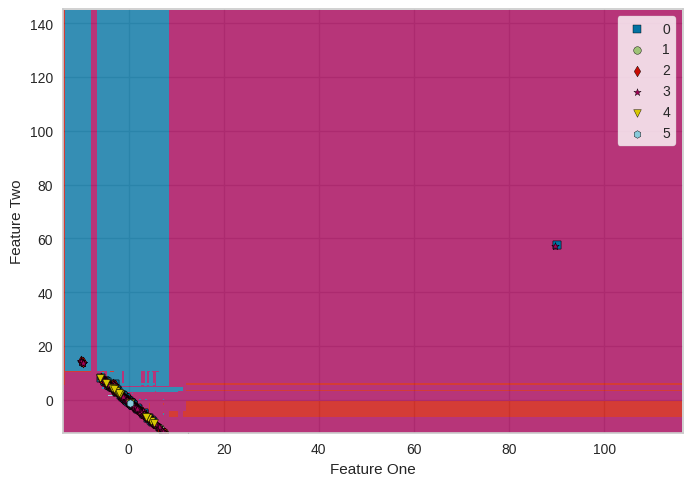

In [79]:
plot_model(best_model, plot="boundary")

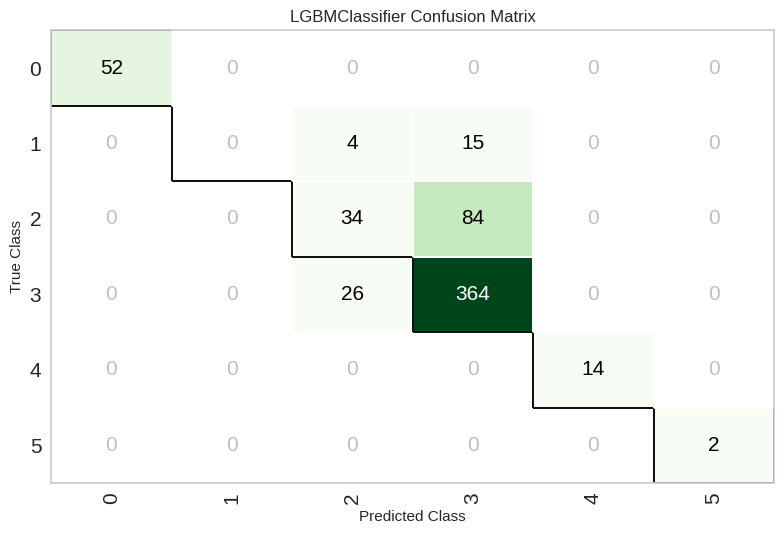

In [80]:
# Plotear la matriz de confusión
plot_model(best_model, plot="confusion_matrix")

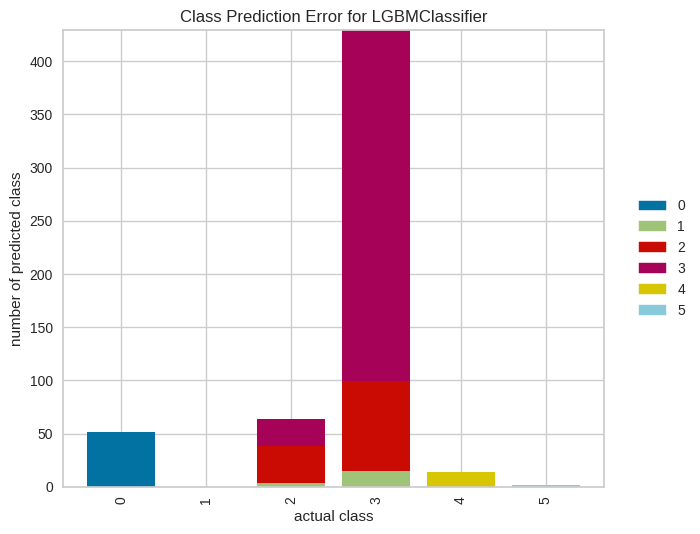

In [85]:
plot_model(best_model, plot="error")

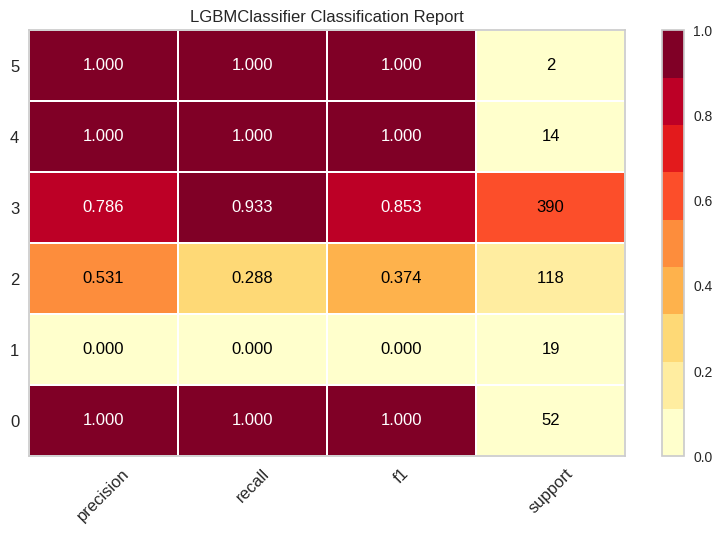

In [86]:
plot_model(best_model, plot="class_report")

In [81]:
final_model = finalize_model(best_model)
final_model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '10', '11', '12',
                                             '13', '14', '15', '16', '17', '18',
                                             '19', '20', '21', '22', '23', '24',
                                             '25', '26', '27'...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=42,
                                reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)

In [82]:
test_data = pd.concat([X_val, y_val], axis=1)
print(test_data.shape)
test_data.head(1)

(661, 310)


,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,causa_def
1871,0.368215,0.055229,0.074087,0.050204,1.283836,1.460531,1.773922,1.597698,1.684464,1.654145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,J439


In [83]:
predictions = predict_model(final_model, data=test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7806,0.8064,0.7806,0.7587,0.7388,0.5146,0.5464


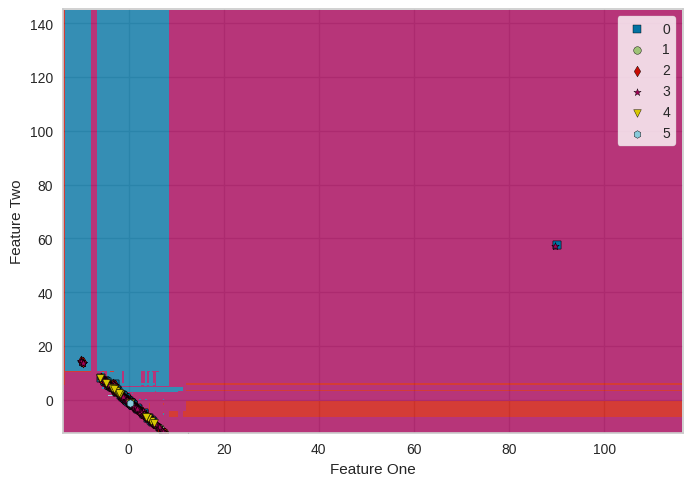

In [88]:
plot_model(final_model, plot="boundary")

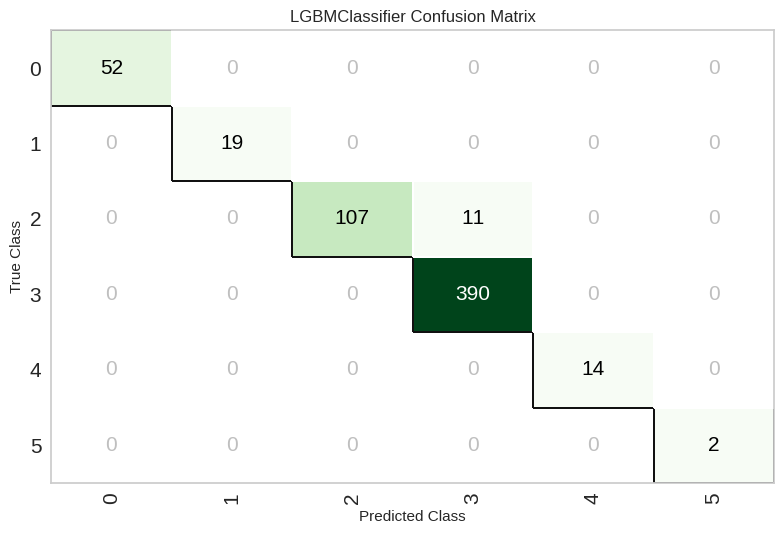

In [84]:
plot_model(final_model, plot="confusion_matrix")

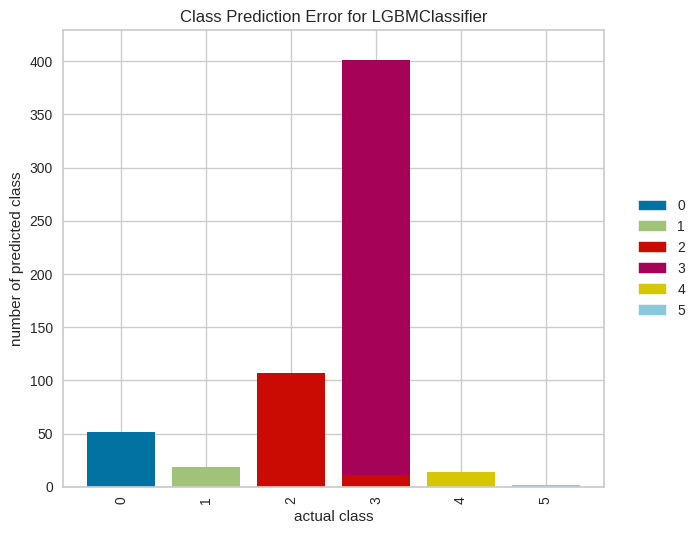

In [89]:
plot_model(final_model, plot="error")

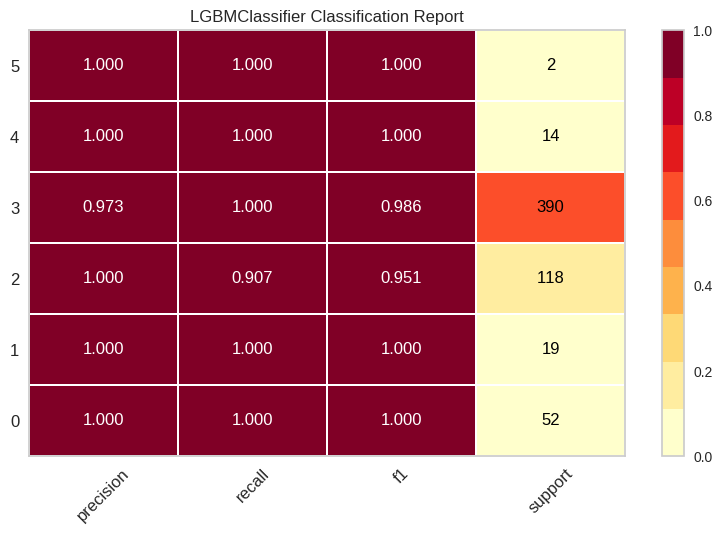

In [90]:
plot_model(final_model, plot="class_report")